#Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import talib
import yfinance as yf
import nltk
import pynance as pn

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Antifragile\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Antifragile\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Load and prepare data
TSLA_data = pd.read_csv(r'C:\Users\Antifragile\Documents\stock-analysis\data\TSLA_historical_data.csv', parse_dates=['Date'])

In [3]:
import pandas as pd

# Load all CSVs into separate DataFrames
tickers = ["AAPL", "AMZN", "GOOG", "META", "MSFT", "NVDA", "TSLA"]
dfs = {}

for ticker in tickers:
    df = aapl_data = pd.read_csv(r'C:\Users\Antifragile\Documents\stock-analysis\data\TSLA_historical_data.csv', parse_dates=['Date'])
    df = df[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
    df.sort_values("Date", inplace=True)
    df.reset_index(drop=True, inplace=True)
    dfs[ticker] = df

C:\Users\Antifragile\AppData\Local\Temp\ipykernel_16872\4212509173.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values("Date", inplace=True)
C:\Users\Antifragile\AppData\Local\Temp\ipykernel_16872\4212509173.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values("Date", inplace=True)
C:\Users\Antifragile\AppData\Local\Temp\ipykernel_16872\4212509173.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.so

In [4]:
# Inspect the index 
print(TSLA_data.index)

# Inspect the columns
print(TSLA_data.columns)

# Select only the last 10 observations of `Close`
ts = TSLA_data['Close'][-10:]

# Check the type of `ts` 
type(ts)

RangeIndex(start=0, stop=3545, step=1)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')


pandas.core.series.Series

In [6]:
# Ensure required columns
for df in [TSLA_data]:
    df.columns = df.columns.str.lower()  # Normalize column names
    required_cols = ['date', 'open', 'high', 'low', 'close', 'volume']
    assert all(col in df.columns for col in required_cols), f"Missing columns in {df}"

In [11]:
print(TSLA_data.index.min(), TSLA_data.index.max())

2010-06-29 00:00:00 2024-07-30 00:00:00


In [14]:
# Load data and set Date as index (do this only once)
TSLA_data = pd.read_csv(r'C:\Users\Antifragile\Documents\stock-analysis\data\TSLA_historical_data.csv', parse_dates=['Date'])
TSLA_data.set_index('Date', inplace=True)

# Inspect the first rows of TSLA data (from IPO onwards)
print(TSLA_data.head())

# Inspect the first rows of 2010
print(TSLA_data.loc['2010'].head())

# Inspect a specific range in 2010
print(TSLA_data.loc['2010-06-29':'2010-07-31'][['Open', 'Close']].head())

                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500   
2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500   
2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000   
2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000   
2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500   

            Dividends  Stock Splits  
Date                                 
2010-06-29        0.0           0.0  
2010-06-30        0.0           0.0  
2010-07-01        0.0           0.0  
2010-07-02        0.0           0.0  
2010-07-06        0.0           0.0  
                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
2010-06-29  1.266667  1.666667  1.169333  1.59266

In [16]:
# Sample 20 rows
sample = TSLA_data.sample(20)

# Print `sample`
print(sample)

# Resample to monthly level 
monthly_TSLA = TSLA_data.resample('M')

# Print `monthly_TSLA`
print(monthly_TSLA)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-02-03  294.000000  312.333344  293.506653  297.046661  297.046661   
2019-08-27   14.382667   14.586667   14.135333   14.272000   14.272000   
2017-01-04   14.316667   15.200000   14.287333   15.132667   15.132667   
2018-01-18   23.044666   23.486668   22.916000   22.971333   22.971333   
2018-06-26   22.403334   22.903334   21.719999   22.799999   22.799999   
2012-08-24    2.004000    2.016000    1.960667    1.966667    1.966667   
2011-03-08    1.640000    1.664000    1.600000    1.644000    1.644000   
2011-06-13    1.871333    1.925333    1.858667    1.895333    1.895333   
2022-09-07  273.100006  283.839996  272.269989  283.700012  283.700012   
2014-10-21   15.618000   15.692667   15.386667   15.689333   15.689333   
2015-10-07   15.775333   15.846667   15.274667   15.464000   15.464000   
2018-07-25   19.782667   20.641333   1

C:\Users\Antifragile\AppData\Local\Temp\ipykernel_16872\350573169.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_TSLA = TSLA_data.resample('M')


In [17]:
# Add a column `diff` to `TSLA` 
TSLA_data['diff'] = TSLA_data.Open - TSLA_data.Close

# Delete the new `diff` column
del TSLA_data['diff']

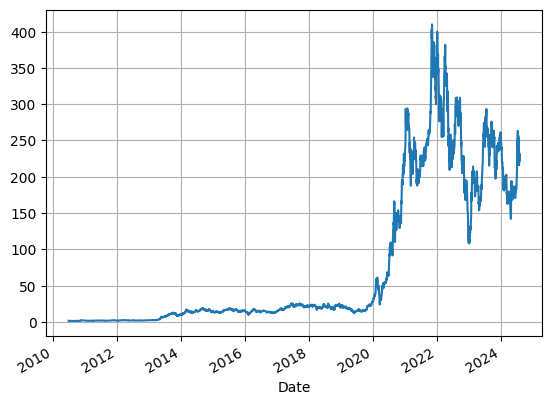

In [18]:
# Plot the closing prices for `TSLA`
TSLA_data['Close'].plot(grid=True)

# Show the plot
plt.show()

In [19]:
# Assign `Adj Close` to `daily_close`
daily_close = TSLA_data[['Adj Close']]

# Daily returns
daily_pct_c = daily_close.pct_change()

# Replace NA values with 0
daily_pct_c.fillna(0, inplace=True)

# Inspect daily returns
print(daily_pct_c)

# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

# Print daily log returns
print(daily_log_returns)

            Adj Close
Date                 
2010-06-29   0.000000
2010-06-30  -0.002511
2010-07-01  -0.078473
2010-07-02  -0.125683
2010-07-06  -0.160937
...               ...
2024-07-24  -0.123346
2024-07-25   0.019723
2024-07-26  -0.002043
2024-07-29   0.055960
2024-07-30  -0.040845

[3545 rows x 1 columns]
            Adj Close
Date                 
2010-06-29        NaN
2010-06-30  -0.002515
2010-07-01  -0.081723
2010-07-02  -0.134312
2010-07-06  -0.175470
...               ...
2024-07-24  -0.131643
2024-07-25   0.019531
2024-07-26  -0.002045
2024-07-29   0.054450
2024-07-30  -0.041702

[3545 rows x 1 columns]


In [20]:
# Resample `TSLA` to business months, take last observation as value 
monthly = TSLA_data.resample('BM').apply(lambda x: x[-1])

# Calculate the monthly percentage change
monthly.pct_change()

# Resample `TSLA` to quarters, take the mean as value per quarter
quarter = TSLA_data.resample("4M").mean()

# Calculate the quarterly percentage change
quarter.pct_change()

C:\Users\Antifragile\AppData\Local\Temp\ipykernel_16872\1718769527.py:2: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  monthly = TSLA_data.resample('BM').apply(lambda x: x[-1])
C:\Users\Antifragile\AppData\Local\Temp\ipykernel_16872\1718769527.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  monthly = TSLA_data.resample('BM').apply(lambda x: x[-1])
C:\Users\Antifragile\AppData\Local\Temp\ipykernel_16872\1718769527.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  quarter = TSLA_data.resample("4M").mean()


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2010-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-10-31,-0.094814,-0.253143,-0.037656,-0.156605,-0.156605,-0.931802,NaN,NaN
2011-02-28,0.345036,0.351154,0.346275,0.352890,0.352890,0.222838,NaN,NaN
2011-06-30,-0.032950,-0.039480,-0.026162,-0.033908,-0.033908,0.027969,NaN,NaN
2011-10-31,-0.003789,0.000884,-0.005496,-0.001001,-0.001001,-0.328195,NaN,NaN
2012-02-29,0.162284,0.160022,0.164381,0.164174,0.164174,0.128190,NaN,NaN
2012-06-30,0.068987,0.066443,0.069270,0.063553,0.063553,0.059888,NaN,NaN
2012-10-31,-0.095591,-0.095465,-0.094729,-0.095462,-0.095462,0.037991,NaN,NaN
2013-02-28,0.168294,0.166681,0.175724,0.174190,0.174190,0.135554,NaN,NaN


In [21]:
# Daily returns
daily_pct_c = daily_close / daily_close.shift(1) - 1

# Print `daily_pct_c`
print(daily_pct_c)

            Adj Close
Date                 
2010-06-29        NaN
2010-06-30  -0.002511
2010-07-01  -0.078473
2010-07-02  -0.125683
2010-07-06  -0.160937
...               ...
2024-07-24  -0.123346
2024-07-25   0.019723
2024-07-26  -0.002043
2024-07-29   0.055960
2024-07-30  -0.040845

[3545 rows x 1 columns]


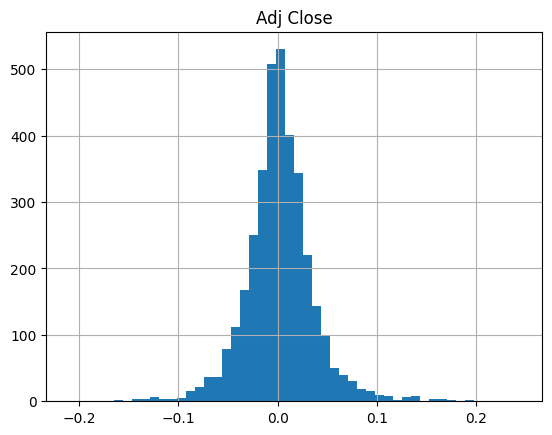

         Adj Close
count  3544.000000
mean      0.002035
std       0.035871
min      -0.210628
25%      -0.016076
50%       0.001223
75%       0.019257
max       0.243951


In [22]:
# Plot the distribution of `daily_pct_c`
daily_pct_c.hist(bins=50)

# Show the plot
plt.show()

# Pull up summary statistics
print(daily_pct_c.describe())

In [23]:
# Calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_c).cumprod()

# Print `cum_daily_return`
print(cum_daily_return)

             Adj Close
Date                  
2010-06-29         NaN
2010-06-30    0.997489
2010-07-01    0.919213
2010-07-02    0.803683
2010-07-06    0.674341
...                ...
2024-07-24  135.615297
2024-07-25  138.290052
2024-07-26  138.007509
2024-07-29  145.730406
2024-07-30  139.778119

[3545 rows x 1 columns]


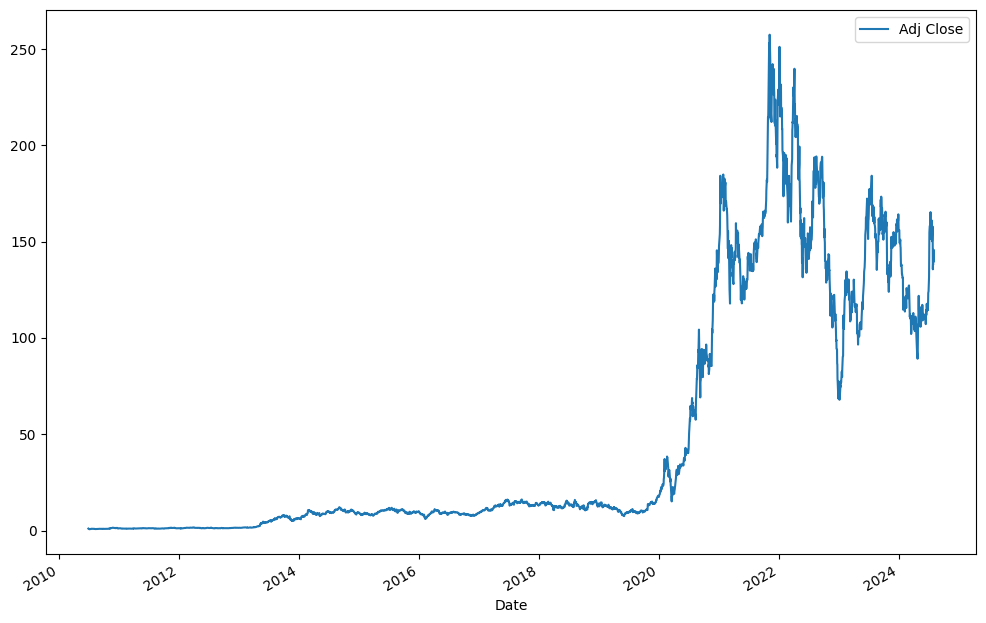

In [24]:
import matplotlib.pyplot as plt 

# Plot the cumulative daily returns
cum_daily_return.plot(figsize=(12,8))

# Show the plot
plt.show()

In [28]:
# Technical Indicators using TA-Lib
TSLA_data['SMA20'] = talib.SMA(TSLA_data['Close'], timeperiod=20)
TSLA_data['RSI'] = talib.RSI(TSLA_data['Close'], timeperiod=14)
TSLA_data['MACD'], TSLA_data['MACD_signal# Technical Indicators (TA-Lib)'], TSLA_data['MACD_hist'] = talib.MACD(TSLA_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

In [29]:
# Isolate the adjusted closing prices 
adj_close_px = TSLA_data['Adj Close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
moving_avg[-10:]

Date
2024-07-17    200.778750
2024-07-18    202.635750
2024-07-19    203.950750
2024-07-22    205.735749
2024-07-23    207.551749
2024-07-24    208.470499
2024-07-25    209.557999
2024-07-26    210.648249
2024-07-29    211.981000
2024-07-30    213.094500
Name: Adj Close, dtype: float64

#Moving Windows

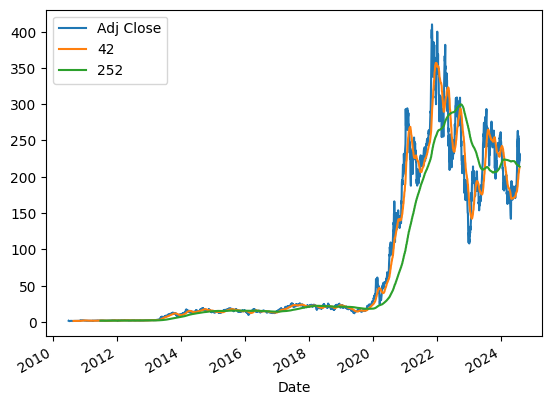

In [31]:
# Short moving window rolling mean
TSLA_data['42'] = adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
TSLA_data['252'] = adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
TSLA_data[['Adj Close', '42', '252']].plot()

plt.show()

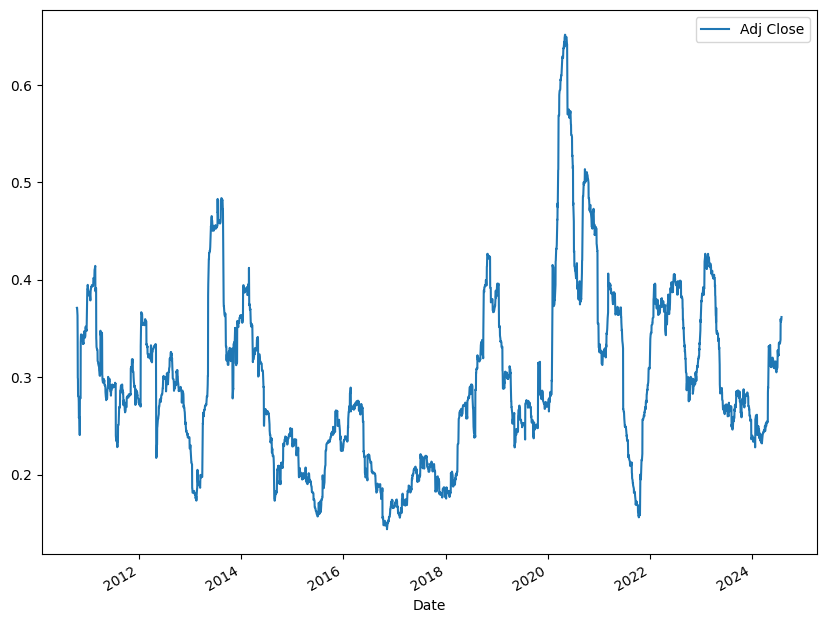

In [32]:
min_periods = 75 

# Calculate the volatility
vol = daily_pct_c.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()

In [34]:
# Initialize the short and long windows
short_window = 40
long_window = 100

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=TSLA_data.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = TSLA_data['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = TSLA_data['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

C:\Users\Antifragile\AppData\Local\Temp\ipykernel_16872\2963633718.py:16: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:]


C:\Users\Antifragile\AppData\Local\Temp\ipykernel_16872\4155582676.py:14: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  ax1.plot(signals.loc[signals.positions == 1.0].index,


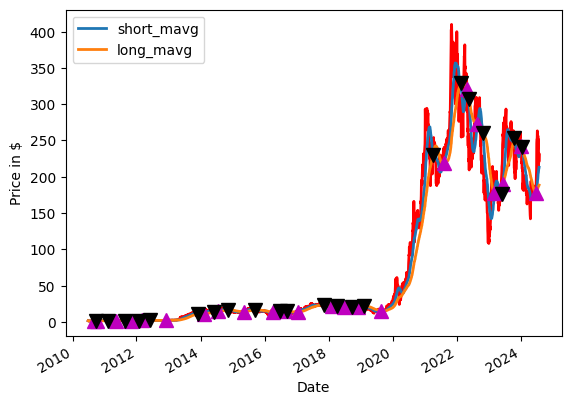

In [35]:
# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
TSLA_data['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()

In [36]:
# Set the initial capital
initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 100 shares
positions['TSLA'] = 100*signals['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(TSLA_data['Adj Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(TSLA_data['Adj Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(TSLA_data['Adj Close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

C:\Users\Antifragile\AppData\Local\Temp\ipykernel_16872\290805956.py:9: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  ax1.plot(portfolio.loc[signals.positions == 1.0].index,


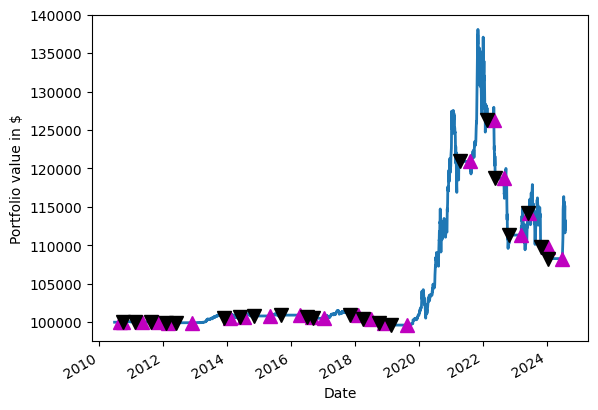

In [37]:
fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

# Plot the "buy" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')

# Plot the "sell" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')
# Show the plot
plt.show()

#Sharpe Ratio

In [38]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

0.1880062610475214


#Maximum Drawdown

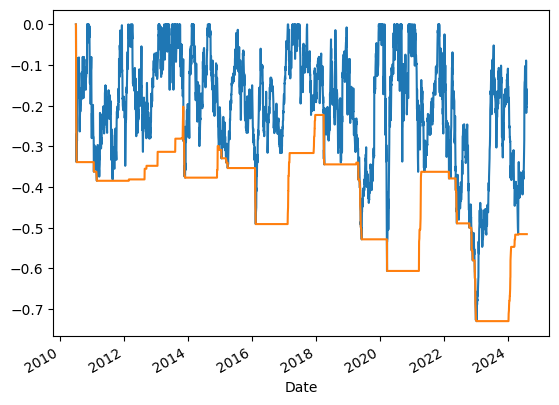

In [39]:
# Define a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day
rolling_max = TSLA_data['Adj Close'].rolling(window, min_periods=1).max()
daily_drawdown = TSLA_data['Adj Close']/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()
# Show the plot
plt.show()

In [40]:
# Get the number of days in `aapl`
days = (TSLA_data.index[-1] - TSLA_data.index[0]).days

# Calculate the CAGR 
cagr = ((((TSLA_data['Adj Close'][-1]) / TSLA_data['Adj Close'][1])) ** (365.0/days)) - 1

# Print CAGR
print(cagr)

0.4199748260646452


C:\Users\Antifragile\AppData\Local\Temp\ipykernel_16872\3521899773.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cagr = ((((TSLA_data['Adj Close'][-1]) / TSLA_data['Adj Close'][1])) ** (365.0/days)) - 1


#PLOT SMA

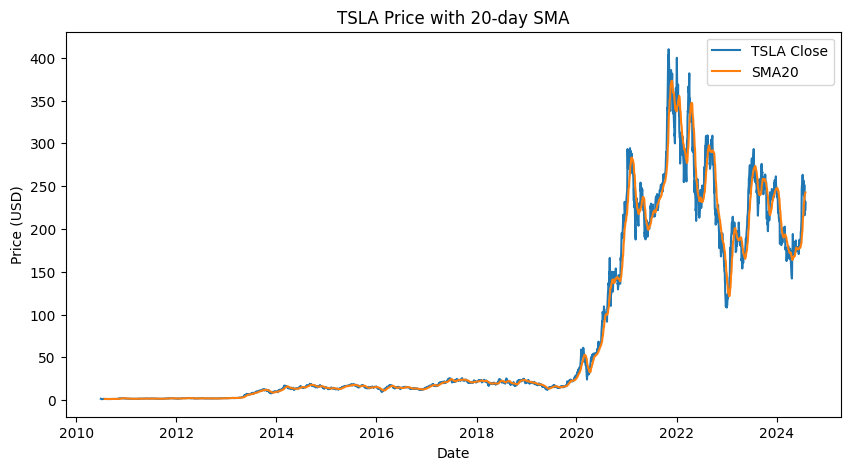

In [50]:
# Visualize Data
plt.figure(figsize=(10, 5))
plt.plot(TSLA_data.index, TSLA_data['Close'], label='TSLA Close')
plt.plot(TSLA_data.index, TSLA_data['SMA20'], label='SMA20')
plt.title('TSLA Price with 20-day SMA')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

#Plot MACD

In [53]:
TSLA_data['MACD'], TSLA_data['MACD_signal'], TSLA_data['MACD_hist'] = talib.MACD(
    TSLA_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9
)

c:\Users\Antifragile\stock-analysis\taenv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


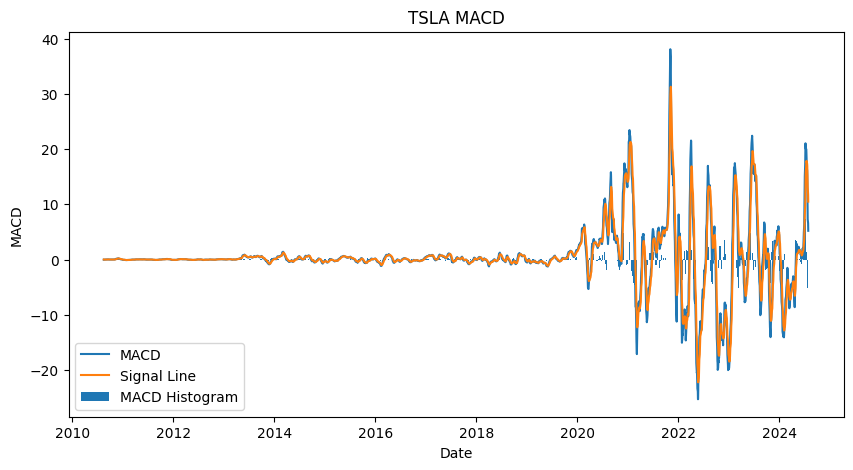

In [54]:

# Plot MACD
plt.figure(figsize=(10, 5))
plt.plot(TSLA_data.index, TSLA_data['MACD'], label='MACD')
plt.plot(TSLA_data.index, TSLA_data['MACD_signal'], label='Signal Line')
plt.bar(TSLA_data.index, TSLA_data['MACD_hist'], label='MACD Histogram')
plt.title('TSLA MACD')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.show()

#Plot RSI

In [44]:
TSLA_data['RSI'] = talib.RSI(TSLA_data['Close'], timeperiod=14)

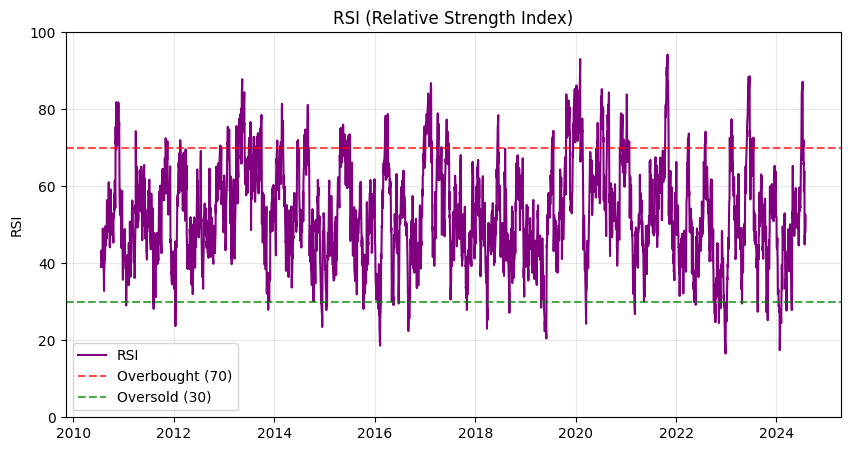

In [45]:
plt.figure(figsize=(10, 5))
plt.plot(TSLA_data.index, TSLA_data['RSI'], label='RSI', color='purple')
plt.axhline(y=70, color='r', linestyle='--', alpha=0.7, label='Overbought (70)')
plt.axhline(y=30, color='g', linestyle='--', alpha=0.7, label='Oversold (30)')
plt.title('RSI (Relative Strength Index)')
plt.ylabel('RSI')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 100)
plt.show()

#Plot Bollinger

In [46]:
# Calculate Bollinger Bands (20-day window, 2 std)
window = 20
TSLA_data['SMA20'] = TSLA_data['Close'].rolling(window).mean()
TSLA_data['BB_Upper'] = TSLA_data['SMA20'] + 2 * TSLA_data['Close'].rolling(window).std()
TSLA_data['BB_Lower'] = TSLA_data['SMA20'] - 2 * TSLA_data['Close'].rolling(window).std()

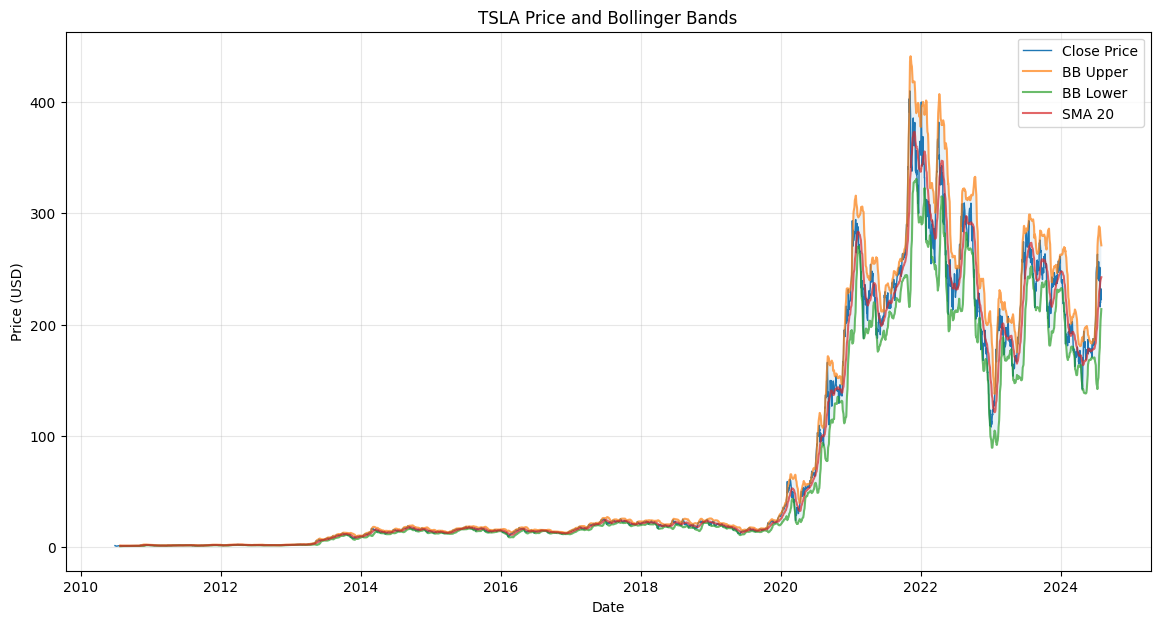

In [47]:
plt.figure(figsize=(14, 7))

# Plot Close price
plt.plot(TSLA_data.index, TSLA_data['Close'], label='Close Price', linewidth=1)

# Plot Bollinger Bands (make sure you have calculated these columns first)
plt.plot(TSLA_data.index, TSLA_data['BB_Upper'], label='BB Upper', alpha=0.7)
plt.plot(TSLA_data.index, TSLA_data['BB_Lower'], label='BB Lower', alpha=0.7)
plt.plot(TSLA_data.index, TSLA_data['SMA20'], label='SMA 20', alpha=0.7)

plt.fill_between(TSLA_data.index, TSLA_data['BB_Upper'], TSLA_data['BB_Lower'], alpha=0.1)

plt.title('TSLA Price and Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

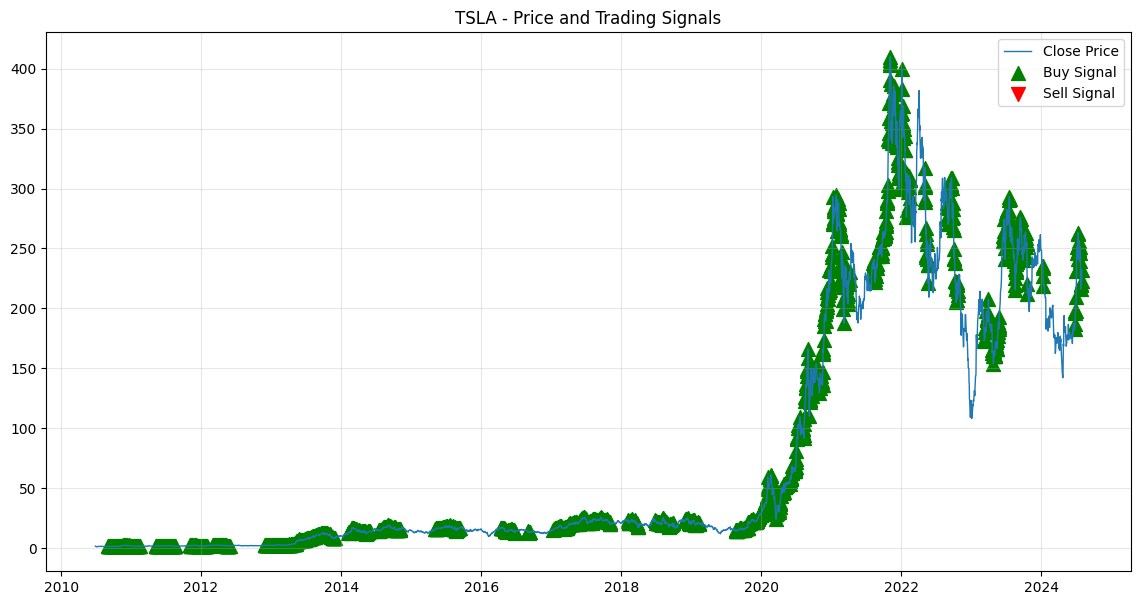

In [48]:
# Filter buy and sell signals
buy_signals = signals[signals['signal'] == 1]
sell_signals = signals[signals['signal'] == -1]

# Example: plot buy/sell signals on price chart
plt.figure(figsize=(14, 7))
plt.plot(TSLA_data.index, TSLA_data['Close'], label='Close Price', linewidth=1)
plt.scatter(buy_signals.index, TSLA_data.loc[buy_signals.index, 'Close'], color='green', marker='^', s=100, label='Buy Signal')
plt.scatter(sell_signals.index, TSLA_data.loc[sell_signals.index, 'Close'], color='red', marker='v', s=100, label='Sell Signal')
plt.title('TSLA - Price and Trading Signals')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()